<img src="../../assets/mimocko_logo_white.png" style="margin-left:auto;margin-right:auto;width:50%">

In [1]:
import pandas as pd

In [2]:
import datetime # una libreria per gestire particolari tipi di dati (date, tempi, etc.)

In [30]:
# una funzione che ci tornerà comoda... per ora non ci soffermiamo su cosa fa

def process_viaggi_data(df: pd.DataFrame) -> pd.DataFrame:
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        df['coordinate_ritiro'] = df['luogoRitiro'].apply(lambda x: eval(x)[0])
        df['coordinate_consegna'] = df['luogoConsegna'].apply(lambda x: eval(x)[0])
        df['lat_ritiro'] = df['coordinate_ritiro'].apply(lambda x: x[0])
        df['lon_ritiro'] = df['coordinate_ritiro'].apply(lambda x: x[1])
        df['lat_consegna'] = df['coordinate_consegna'].apply(lambda x: x[0])
        df['lon_consegna'] = df['coordinate_consegna'].apply(lambda x: x[1])
    return df

# Utenti

In [3]:
path_to_file = '../../../dati-mimocko'

## Caricamento del CSV con opzioni di default

In [4]:
utenti = pd.read_csv(
    f'{path_to_file}/utenti.csv'
)

In [5]:
utenti.head()

,,,,ID UTENTE|NOME|COGNOME|SESSO|DATA di NASCITA|LUOGO di NASCITA|C.F.|INDIRIZZO E-MAIL|INDIRIZZO|LAT INDIRIZZO|LON INDIRIZZO|PATENTE #|DATA ULTIMO RINNOVO PATENTE|CONSENSO al TRATTAMENTO dei DATI|TITOLO di STUDIO
u6586|Dario|Nibali|M|12/09/1986|Torino|NBLDRA86P12L219E||GENOVA,VIA VAL D'ASTICO,156|44,4946921|8,908447|U19713653J|2019-03-30|False|
u2188|Giacinto|Ferraris|M|24/05/1986|Carrara|FRRGNT86E24B832A|ferraris86@vodafone.it|GENOVA,VIA SAMBUGO,10|44,4491083|8,6963344|U18283370F|2019-08-19|False|diploma di...
u5528|Fiorenzo|Morosini|M|11/02/1988|Siena|MRSFNZ88B11I726L||GENOVA,VIA DI BURLO,1|44,4420369|8,8755262|U10335012S|2014-01-25|False|
u1224|Ruggero|Ciani|M|26/11/1974|Lavagna|CNIRGR74S26E488U||GENOVA,VIA CEBA',3|44,4085441|8,9360784|U12038058X|2018-10-08|False|diploma di...
u6553|Umberto|Baglioni|M|15/03/1985|Monza|BGLMRT85C15F704T||GENOVA,CORSO ITALIA,7|44,3914268|8,9560019|U11861180V|2017-11-13|True|licenza di ...


### Hint: provare ad aprire il CSV con editor di testo

## Caricamento del CSV con indicazione del separatore di campi

In [6]:
utenti = pd.read_csv(
    f'{path_to_file}/utenti.csv',
    sep='|'
)

In [7]:
utenti.head()

,ID UTENTE,NOME,COGNOME,SESSO,DATA di NASCITA,LUOGO di NASCITA,C.F.,INDIRIZZO E-MAIL,INDIRIZZO,LAT INDIRIZZO,LON INDIRIZZO,PATENTE #,DATA ULTIMO RINNOVO PATENTE,CONSENSO al TRATTAMENTO dei DATI,TITOLO di STUDIO
0,u6586,Dario,Nibali,M,12/09/1986,Torino,NBLDRA86P12L219E,NaN,"GENOVA, VIA VAL D'ASTICO, 156","44,4946921","8,908447",U19713653J,2019-03-30,False,NaN
1,u2188,Giacinto,Ferraris,M,24/05/1986,Carrara,FRRGNT86E24B832A,ferraris86@vodafone.it,"GENOVA, VIA SAMBUGO, 10","44,4491083","8,6963344",U18283370F,2019-08-19,False,diploma di scuola secondaria superiore (4-5 anni)
2,u5528,Fiorenzo,Morosini,M,11/02/1988,Siena,MRSFNZ88B11I726L,NaN,"GENOVA, VIA DI BURLO, 1","44,4420369","8,8755262",U10335012S,2014-01-25,False,NaN
3,u1224,Ruggero,Ciani,M,26/11/1974,Lavagna,CNIRGR74S26E488U,NaN,"GENOVA, VIA CEBA', 3","44,4085441","8,9360784",U12038058X,2018-10-08,False,diploma di scuola secondaria superiore (4-5 anni)
4,u6553,Umberto,Baglioni,M,15/03/1985,Monza,BGLMRT85C15F704T,NaN,"GENOVA, CORSO ITALIA, 7","44,3914268","8,9560019",U11861180V,2017-11-13,True,licenza di scuola elementare


In [8]:
utenti.loc[2074]

ID UTENTE                                                                        u551
NOME                                                                           Emilio
COGNOME                                                                     Guglielmi
SESSO                                                                               M
DATA di NASCITA                                                            30/03/1986
LUOGO di NASCITA                                                               Genova
C.F.                                                                 GGLMLE86C30D969A
INDIRIZZO E-MAIL                                           emilio.guglielmi@libero.it
INDIRIZZO                                        GENOVA, VIA SAN MICHELE DEL CARSO, 3
LAT INDIRIZZO                                                               45,465383
LON INDIRIZZO                                                               9,1647729
PATENTE #                                             

In [9]:
utenti.dtypes

ID UTENTE                           object
NOME                                object
COGNOME                             object
SESSO                               object
DATA di NASCITA                     object
LUOGO di NASCITA                    object
C.F.                                object
INDIRIZZO E-MAIL                    object
INDIRIZZO                           object
LAT INDIRIZZO                       object
LON INDIRIZZO                       object
PATENTE #                           object
DATA ULTIMO RINNOVO PATENTE         object
CONSENSO al TRATTAMENTO dei DATI      bool
TITOLO di STUDIO                    object
dtype: object

## caricamento del CSV con indicazione del separatore delle cifre decimali

In [10]:
utenti = pd.read_csv(
    f'{path_to_file}/utenti.csv',
    sep='|',
    decimal=','
)

In [11]:
utenti.head()

,ID UTENTE,NOME,COGNOME,SESSO,DATA di NASCITA,LUOGO di NASCITA,C.F.,INDIRIZZO E-MAIL,INDIRIZZO,LAT INDIRIZZO,LON INDIRIZZO,PATENTE #,DATA ULTIMO RINNOVO PATENTE,CONSENSO al TRATTAMENTO dei DATI,TITOLO di STUDIO
0,u6586,Dario,Nibali,M,12/09/1986,Torino,NBLDRA86P12L219E,NaN,"GENOVA, VIA VAL D'ASTICO, 156",44.494692,8.908447,U19713653J,2019-03-30,False,NaN
1,u2188,Giacinto,Ferraris,M,24/05/1986,Carrara,FRRGNT86E24B832A,ferraris86@vodafone.it,"GENOVA, VIA SAMBUGO, 10",44.449108,8.696334,U18283370F,2019-08-19,False,diploma di scuola secondaria superiore (4-5 anni)
2,u5528,Fiorenzo,Morosini,M,11/02/1988,Siena,MRSFNZ88B11I726L,NaN,"GENOVA, VIA DI BURLO, 1",44.442037,8.875526,U10335012S,2014-01-25,False,NaN
3,u1224,Ruggero,Ciani,M,26/11/1974,Lavagna,CNIRGR74S26E488U,NaN,"GENOVA, VIA CEBA', 3",44.408544,8.936078,U12038058X,2018-10-08,False,diploma di scuola secondaria superiore (4-5 anni)
4,u6553,Umberto,Baglioni,M,15/03/1985,Monza,BGLMRT85C15F704T,NaN,"GENOVA, CORSO ITALIA, 7",44.391427,8.956002,U11861180V,2017-11-13,True,licenza di scuola elementare


In [12]:
utenti.dtypes

ID UTENTE                            object
NOME                                 object
COGNOME                              object
SESSO                                object
DATA di NASCITA                      object
LUOGO di NASCITA                     object
C.F.                                 object
INDIRIZZO E-MAIL                     object
INDIRIZZO                            object
LAT INDIRIZZO                       float64
LON INDIRIZZO                       float64
PATENTE #                            object
DATA ULTIMO RINNOVO PATENTE          object
CONSENSO al TRATTAMENTO dei DATI       bool
TITOLO di STUDIO                     object
dtype: object

## caricamento del CSV con indicazione del tipo di alcune colonne

In [13]:
utenti = pd.read_csv(
    f'{path_to_file}/utenti.csv',
    sep='|',
    decimal=',',
    parse_dates=[
        'DATA di NASCITA',
        'DATA ULTIMO RINNOVO PATENTE'
    ]
)

In [14]:
utenti.head()

,ID UTENTE,NOME,COGNOME,SESSO,DATA di NASCITA,LUOGO di NASCITA,C.F.,INDIRIZZO E-MAIL,INDIRIZZO,LAT INDIRIZZO,LON INDIRIZZO,PATENTE #,DATA ULTIMO RINNOVO PATENTE,CONSENSO al TRATTAMENTO dei DATI,TITOLO di STUDIO
0,u6586,Dario,Nibali,M,1986-12-09,Torino,NBLDRA86P12L219E,NaN,"GENOVA, VIA VAL D'ASTICO, 156",44.494692,8.908447,U19713653J,2019-03-30,False,NaN
1,u2188,Giacinto,Ferraris,M,1986-05-24,Carrara,FRRGNT86E24B832A,ferraris86@vodafone.it,"GENOVA, VIA SAMBUGO, 10",44.449108,8.696334,U18283370F,2019-08-19,False,diploma di scuola secondaria superiore (4-5 anni)
2,u5528,Fiorenzo,Morosini,M,1988-11-02,Siena,MRSFNZ88B11I726L,NaN,"GENOVA, VIA DI BURLO, 1",44.442037,8.875526,U10335012S,2014-01-25,False,NaN
3,u1224,Ruggero,Ciani,M,1974-11-26,Lavagna,CNIRGR74S26E488U,NaN,"GENOVA, VIA CEBA', 3",44.408544,8.936078,U12038058X,2018-10-08,False,diploma di scuola secondaria superiore (4-5 anni)
4,u6553,Umberto,Baglioni,M,1985-03-15,Monza,BGLMRT85C15F704T,NaN,"GENOVA, CORSO ITALIA, 7",44.391427,8.956002,U11861180V,2017-11-13,True,licenza di scuola elementare


In [15]:
utenti.dtypes

ID UTENTE                                   object
NOME                                        object
COGNOME                                     object
SESSO                                       object
DATA di NASCITA                     datetime64[ns]
LUOGO di NASCITA                            object
C.F.                                        object
INDIRIZZO E-MAIL                            object
INDIRIZZO                                   object
LAT INDIRIZZO                              float64
LON INDIRIZZO                              float64
PATENTE #                                   object
DATA ULTIMO RINNOVO PATENTE         datetime64[ns]
CONSENSO al TRATTAMENTO dei DATI              bool
TITOLO di STUDIO                            object
dtype: object

In [17]:
a = utenti.loc[0, 'DATA di NASCITA']

## Distribuzione di genere

### Pandas groupby

In [16]:
utenti.groupby('SESSO').size()

SESSO
F    4988
M    4012
dtype: int64

### visualizzazione

<AxesSubplot:xlabel='SESSO'>

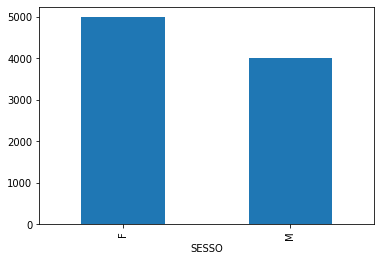

In [17]:
utenti.groupby('SESSO').size().plot.bar()

## distribuzione dei titoli di studio

## distribuzione dei luoghi di nascita (i 10 più frequenti)

## distribuzione dell'anno di nascita

## BONUS: distribuzione delle età

## BONUS: distribuzione del consenso al trattamento dei dati

# Viaggi

In [18]:
viaggi = pd.read_csv(
    f'{path_to_file}/viaggi.csv',
    sep='*',
    decimal=','
)

In [19]:
viaggi.head()

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,u5954,v33,100.0%,YES,"[(44.394923, 8.943928), (44.394857, 8.943474),...","['2018-10-01 01:08:57', '2018-10-01 01:09:02',...","[(44.433961, 8.95907), (44.434021, 8.958851), ...","['2018-10-01 01:21:57', '2018-10-01 01:22:02',...",4.5046 km,0:13:20,7.55,90.2%
1,u1478,v33,91.8%,NaN,"[(44.433997, 8.958993), (44.433596, 8.959153),...","['2018-10-01 02:09:21', '2018-10-01 02:09:26',...","[(44.396783, 8.940881), (44.396705, 8.940446),...","['2018-10-01 02:21:06', '2018-10-01 02:21:11',...",4.3622 km,0:12:05,7.78,81.8%
2,u3403,v103,100.0%,YES,"[(44.50046, 8.903424), (44.500047, 8.903264), ...","['2018-10-01 02:56:08', '2018-10-01 02:56:13',...","[(44.417878, 8.921285), (44.417927, 8.92169), ...","['2018-10-01 03:23:29', '2018-10-01 03:23:34',...",9.2642 km,0:27:41,8.02,82.6%
3,u3723,v6,100.0%,YES,"[(44.404821, 8.959312), (44.404645, 8.959509),...","['2018-10-01 03:45:47', '2018-10-01 03:45:52',...","[(44.427887, 8.844981), (44.428135, 8.845328),...","['2018-10-01 04:14:12', '2018-10-01 04:14:17',...",9.4183 km,0:28:45,8.23,84.2%
4,u8584,v95,100.0%,YES,"[(44.416034, 8.933454), (44.416018, 8.93355), ...","['2018-10-01 05:15:03', '2018-10-01 05:15:08',...","[(44.421412, 8.865522), (44.422039, 8.865464),...","['2018-10-01 05:33:20', '2018-10-01 05:33:25',...",5.4345 km,0:18:37,5.20,88.0%


## Punteggi Viaggio (DrivingScore)

## Esiste qualche relazione tra il punteggioViaggi dei viaggi e le caratteristiche degli utenti?

### genere vs. punteggioViaggi

### età vs. punteggioViaggi

## BONUS: si possono visualizzare in maniera significativa le coordinate dei luoghi di pickup?